# Análisis Exploratorio de Datos

## Introducción

Uno de los primeros pasos para desarrollar un proyecto de ciencia de datos es entender los datos. Para esto, una técnica que se utiliza un **Análisis Exploratorio de Datos**, en el que se exploran los datos y se resumen sus principales características. El principal objetivo es adquirir intruición sobre el contenido de los datos, para ayudar a enmarcar las preguntas que se harán y para proponer posibles caminos para llegar a respuestas a esas preguntas.

En esa sección trabajaremos con un conjunto de datos estándar muy usado en aprendizaje automático, que consiste en informaciones sobre viviendas en districtos del estado de California, EEUU. En realidad usaremos una versión ligeramente modificada, peraprada por Aurélien Géron.

**Plan**

La idea para hoy es avanzar en la lista de pasos hacia un proyecto exitoso de aprendizaje automático:

1. Recolectar los datos.

2. Descubrir y visualizar los datos de forma a aquirir intuición sobre ellos.
    * ¿Qué tipos de preguntas podemos intentar responder con este conjunto de datos?

    * ¿Necesitamos de más datos?


3. Definir el proyecto.

El miércoles veremos el próximo paso importante

4. Preprocesamiento. Preparar los datos para algoritmos de aprendizaje automático (**miércoles**).

5. Selección de modelos, entrenamiento, ajuste fino, ... (**miércoles**).

## Celdas preparatórias

Primero necesitaremos ejecutar algunas celdas de código para establecer el entorno. 

**Nota importante**: mucho de lo que sigue es basado en el libro de A. Géron y su repositorio git asociado [repositorio GitHub](https://github.com/ageron/handson-ml2).

In [ ]:
# se requiere Python versión ≥3.5
import sys
assert sys.version_info >= (3, 5)

# se requiere Scikit-Learn ≥0.20  
import sklearn
assert sklearn.__version__ >= "0.20"

# imports frecuentes
import numpy as np
import os

# Para hacer figuras bellas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Donde grabar las figuras
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "01_AED"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignorar avisos sin utilidad (ver SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Baja la imagen de California
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)
DOWNLOAD_ROOT = "https://github.com/IAI-UNSAM/datasets/raw/master/"
filename = "Map_of_California.png"
print("Downloading {} from {}".format(filename, DOWNLOAD_ROOT))

MAP_URL = DOWNLOAD_ROOT + "images/" + filename

def fetch_california_map(map_url=MAP_URL, image_path=IMAGES_PATH):
    os.makedirs(image_path, exist_ok=True)
    !wget {map_url} -P {image_path}
    return

fetch_california_map()

--2022-09-19 12:50:42--  https://github.com/IAI-UNSAM/datasets/raw/master/images/Map_of_California.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/images/Map_of_California.png [following]
--2022-09-19 12:50:42--  https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/images/Map_of_California.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 295301 (288K) [image/png]
Saving to: ‘./images/Map_of_California.png’

Map_of_California.p 100%[===================>] 288.38K  --.-KB/s    in 0.04s   

2022-09-19 12:50:42 (6.95 MB/s) - ‘./images/Map_of_California.png’ sav

## Recolectando los datos

El primer paso es acceder a los datos. Un archivo del tipo `csv` (valores separados por coma) está disponible en un repositorio público y también en el aula virtual del curso. Esta celda bajará primero el archivo que se necesita.

In [ ]:
import tarfile

HOUSING_PATH = "datasets"
DOWNLOAD_ROOT = "https://github.com/IAI-UNSAM/datasets/raw/master/"
HOUSING_URL = DOWNLOAD_ROOT + "housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    !wget {housing_url} -P {housing_path}
    tgz_path = os.path.join(housing_path, "housing.tgz")
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return
        
# Ejecuta la función que acabamos de crear
fetch_housing_data()

--2022-09-19 12:50:53--  https://github.com/IAI-UNSAM/datasets/raw/master/housing/housing.tgz
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/housing/housing.tgz [following]
--2022-09-19 12:50:53--  https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/housing/housing.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409488 (400K) [application/octet-stream]
Saving to: ‘datasets/housing.tgz’

housing.tgz         100%[===================>] 399.89K  --.-KB/s    in 0.04s   

2022-09-19 12:50:54 (8.89 MB/s) - ‘datasets/housing.tgz’ saved [409488/409488]



Ahora, importemos el módulo  `pandas` y definamos una función para leer los datos en una de las clases de `pandas`, un `DataFrame`.

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# La función carga los datos como una instancia DataFrame de Pandas
housing = load_housing_data()

## Exploración de los datos

Ahora tenemos los datos en un formato muy práctico (y muy usado), una instancia `pandas.DataFrame`, referida por la variable `housing`.

Si no estás familiarizado/a con  `Pandas`, acá mostraremos algunas formas bastante básicas de mirar los contenidos de una tabla. Recordar siempre que se puede agregar `?` a un objeto o método para acceder a su documentación (por ejemplo, `housing?` or `housing.head?`).

***

**1.** Para ver las primeras líneas de una tabla, use el método  `head`, que permite definir un argumento opcional indicando cuantas líneas mostrar.

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Este método acepta un argumento opcional, `n`, que define cuántas líneas se muestras. 

**Pruébenlo**. Remplacen los puntos `...` por su código. Reucerden que siempre pueden usar `?` al final del método para leer la documentación.

In [ ]:
housing.head(...)

Por otro lado, el nombre de las columnas puede ser accedido con el atributo `columns`.

In [ ]:
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


**2.** El método `.info` provee información básica sobre el contenido de cada columna.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Vemos que hay **20640** *entradas*, con 10 columnas cada. Cada una de esas columnas representa un *atributo* de las entradas. 

**Pregunta**: ¿Sabemos a qué hace referencia cada fila? Es decir, ¿sabemos cuáles son las unidades de este dataset?



Excepto `ocean_proximity`, todos los atributos pueden describirse con variables numéricas (`float64`). Además, faltan datos en la columna `total_bedrooms`. Tendremos que lidiar con eso después...

Démosle una mirada rápida a la columna `ocean_proximity`. Que valores toma? (**Nota**: podemos acceder a las columnas como atributos *data frame*, o con una sintaxis tipo diccionario. En otras palabras, los dos comandos en la celda de abajo son equivalentes).

In [ ]:
print(housing['ocean_proximity'])
print(housing.ocean_proximity)

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object
0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object


Para ver los distintos valores que esta columna toma, usemos el método `unique`.

In [ ]:
print(housing['ocean_proximity'].unique())
print(housing.ocean_proximity.unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


Podemos ir un paso más adelante y ver cuántas veces aparece cada valor.

Para esto, usamos el método `value_counts`.

In [ ]:
print(housing.ocean_proximity.value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [ ]:
# O una versión normalizada al total de entradas
print(housing.ocean_proximity.value_counts(normalize=True))

**Pregunta**: están todas las clases igualmente representadas?

A esto uno se refiere como "desbalance de classes" y será muy importante para los algoritmos de clasificación.

***

**3.** Para columnas numéricas, podemos obtener facilmente estadísticas descriptivas simples.

El método `describe` calcula el promedio, la desviación estándar y otras medidas estadística que describem los datos. 



In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



**Pregunta**: ¿ven algo sorprendente o que valga la pena mencionar? De nuevo, ¿se entiende a que se refiere cada línea en el conjunto de datos (no en esta tabla)?

 **Nota 1**: esto excluye automaticamente `NaN` de los cálculos; vease la entrada `count` en `total_bedrooms`.
 
 **Nota 2**: se puede definir qué percentiles se calculan con el argumento `percentiles` del método `describe`.

**Ejercicio**. Miren la documentación del método usando `?`. ¿Cómo cambia la salida de este método si usamos el argumento `include='all'`.

**¡Prueben!** Intenten entender lo que pasa.

In [ ]:
housing.describe(include=...)

***
**4.** Podemos ordenar la tabla para ver cuales son los districtos donde algunos valores adquieren valores extremos.

Para eso usamos el método `sort_values` y definimos la columna según la cual queremos ordenar la tabla. En el ejemplo de abajo ordenamos la pabla por la columna `median_income`.

In [ ]:
housing.sort_values(by='median_income', ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,<1H OCEAN
10673,-117.85,33.62,13.0,5192.0,658.0,1865.0,662.0,15.0001,500001.0,<1H OCEAN
8849,-118.40,34.08,52.0,3815.0,439.0,1266.0,413.0,15.0001,500001.0,<1H OCEAN
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,<1H OCEAN
5257,-118.49,34.06,42.0,2861.0,360.0,829.0,310.0,15.0001,500001.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3249,-119.99,36.09,23.0,333.0,92.0,198.0,55.0,0.4999,100000.0,INLAND
3258,-122.89,39.42,16.0,411.0,114.0,26.0,19.0,0.4999,73500.0,INLAND
6343,-117.75,34.06,52.0,62.0,9.0,44.0,16.0,0.4999,112500.0,INLAND
5213,-118.28,33.93,52.0,117.0,33.0,74.0,45.0,0.4999,90600.0,<1H OCEAN


**Pregunta**: presten atención a los valores de las primeras y las últimas filas de las variables `median_income` y `median_house value`. ¿Qué identifican? ¿Pueden explicar qué puede estar pasando?



**Nota**: el mismo método se puede ussar para ordenar por más de una columna pasando una lista por el argunento `by`. Por ejemplo, 


In [ ]:
housing.sort_values(by=['median_income', 'total_rooms'], ascending=False)

ordenará la tabla por ingreso (`median_income`) y después por el número total de ambientes (`total_rooms`).

**Ejercicio**. Verifiquen que está dando lo que esperamos, y prueben con otro par de variables. ¿Qué creen que hace el argumento `ascending`?

In [ ]:
housing.sort_values(by=[..., ...], ascending=False)

***

**5.** Podemos agrupar entradas según el valor de una dada variable. Eso es útil para un análisis rápido de los datos.

Para hacer eso, usamos otro método de la clase `DataFrame` llamado `groupby`. 


In [ ]:
grouped_housing = housing.groupby(by='ocean_proximity')


Esto devuelve un nuevo objeto, sobre el que podemos calcular distintas métricas. 

**Ejercicio**. Usen el método `mean()` en el DataFrame `housing` y en el nuevo objeto `grouped_housing`. Discutan la diferencia en el resultado.

In [ ]:
housing.mean()

In [ ]:
grouped_housing.mean()

**Pregunta**: ya podemos decir algo basados en esa tabla? Si pueden, ¡**felicitaciones** por su primera intuición obtenida partir de los datos! ¿Qué aprendieron sobre estos districtos? 

De forma similar al método `sort_values`, se puede pasar una lista al argumento `by` para crear una clasificación anidada.

**Ejercicio**. Discutan qué hace la próxima celda.

In [ ]:
housing.groupby(by=['ocean_proximity', 'total_bedrooms']).count()

***

**6.** Por último, pero no menos importante, podemos explorar estadísticas que involucran más de una variable. La más común es el coeficiente de correlación de Pearson.

Una definición formal está fuera del ámbito del curso, pero digamos solamente que el coeficiente de Pearson de dos variables $X$ y $Y$, escrito como $\hat{\rho_{XY}}$, es un estimador del _verdadero_ coeficiente de correlación y se calcula como:

<!-- $$
\hat{\rho_{XY}} = r = \frac{\hat{\mathrm{cov}}_{XY}}{\hat{\sigma}_X \hat{\sigma}_Y}\;\;,
$$
donde 

$$
\hat{\sigma}_X^2 = \frac{1}{N - 1}\sum_{i=1}^N (x_i - \bar{X})^2\;\;,
$$
$$
\hat{\mathrm{cov}}_{XY} = \frac{1}{N - 1}\sum_{i=1}^N (x_i - \bar{X})(y_i - \bar{Y})\;\;,
$$
y
$$
\hat{\mu_X} = \bar{X}\;\;.
$$ -->

<!-- Notar el significado de esas ecuaciones.  -->

El coeficiente de Pearson aumenta cuando ambas variables se alejan de sus valores promedios en la misma dirección y disminuye si se mueven en direcciones opuestas. Sus valores extremos son -1 y 1, para una (anti-)correlation perfecta entre ambas variables. 

Luego cero significa que las variables no están correlacionadas, correcto? .... **No!**

Para ganar un poco de intuición, discutiamos esta figura, obtenida de [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):

<center><img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg"></center>

Los números sobre cada sub-gráfico indican el valor del coeficiente de Pearson. 

**Pregunta:** Estudien con detenimiento cada una de las filas de este gráfico. ¿Qué pueden concluir?

El coeficiente de Pearson entre todos los pares de variables es calculado facilmente con `pandas` usando el método `corr`.

**Tip**: los argumentos del método permiten elegir la técnica usada para calcular el coeficiente de correlación. Por defecto se calcula el coeficiente de Pearson descripto más arriba.

In [ ]:
corr_matrix = housing.corr()

In [ ]:
# Qué tamaño espera que tenga `corr_matrix`?
print(corr_matrix.shape)

(9, 9)


Podemos mandar imprimir la matriz, pero es más interesante hacer un gráfico de ella.

In [ ]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

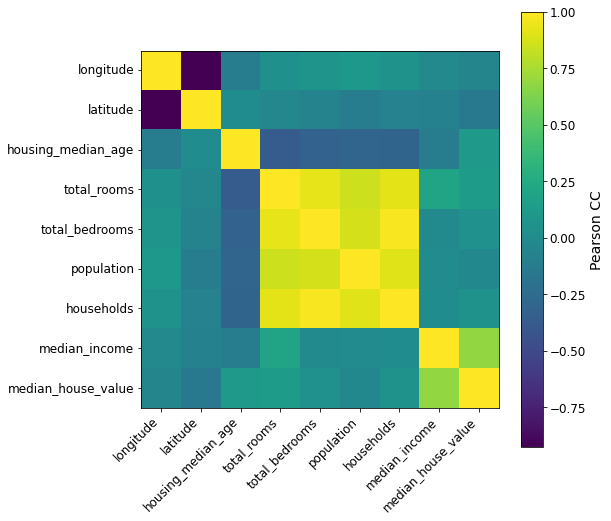

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(corr_matrix)

# Definir las marcaciones 
xt = plt.xticks(np.arange(9), housing.columns[:-1], rotation=45, ha='right', va='top')
yt = plt.yticks(np.arange(9), housing.columns[:-1], rotation=0, ha='right', va='center')

# Definir la barra de colores
plt.colorbar(label='Pearson CC')

**Ejercicio**.

* Miren con detenimiento esta figura.

* Menciones dos pares de variables que estén correlacionadas (positivamente; valores amarillos) y un par que estén claramente anti-correlacionadas (correlacionadas negativamente; valores violetas). Indique además al menos dos pares de variables que estén muy débilmente correlacionads (colores verdes).

* Noten la estructura en bloques del gráfico de arriba. ¿Pueden explicarlo?

* ¿Qué atributo correlaciona más fuertemente con la mediana del valor de las casas? Si tuviéramos que elegir un único atributo para usar como predictor del valor de las casas ¿cuál sería? ¿Por qué?



## Preguntas

Aquí no hay respuestas correctas o equivocadas

1) Qué preguntas pueden ser contestadas con esos datos?

2) Cuales de esas preguntas pueden ser atacadas usando aprendizaje automático? En esos casos, cual es el mapeo de A a B que necesitaría que el algoritmo aprenda?

3) Qué variables piensa que serán más relevantes en ese caso?

## Visualización

Una forma excelente de ganar intuición sobre un conjunto de datos es hacer gráficos.

El paquete más usual para hacer gráficos en python es el `matplotlib`. En particular, muchas de las funciones que usaremos están representadas en el sub-paquete `pyplot` (importado arriba como `plt`).

In [ ]:
plt.plot?

`Pandas` tiene un buen empaquetamiento para `matplotlib.pyplot`, pero intentaremos usar exclusivamente las funciones de `pyplot`.

Otro paquete muy bueno con una interacción fuerte con `pandas` es `seaborn`, pero para evitar la proliferación de paquetes, no discutiremos ese en este curso.

### Histograma

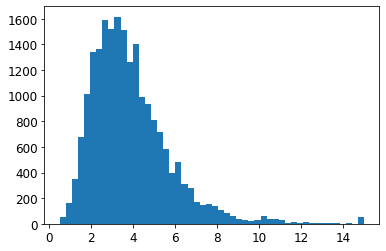

In [ ]:
h = plt.hist(housing.median_income, 50)

### Gráficos de violin

Los gráficos de violin son una buena forma de descubrir compartamientos en distribuciones de datos, separados por categorías. El gráfico de violin consiste en un gráfico vertical de la distribución de una variable usando una especie de filtro de suavización (en realidad una técnica de estimación de densidad).

Ejemplo. Ya vimos cómo algunos parámetros cambian con la categoría `ocean_proximity`. Intentemos ver ese comportamiento con un gráfico simple.

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Text(0, 0.5, 'Median House Value')

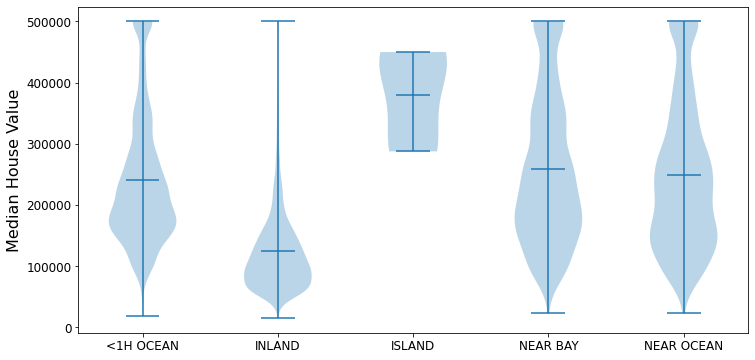

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

categories = housing.ocean_proximity.unique()

# Preparar los datos para que sean graficados. Separar por categoría en ocean_proximity y transformar el array
datos = housing.groupby('ocean_proximity').median_house_value.apply(np.array)

ax.violinplot(datos, showextrema=True, showmeans=True, points=1000)

# Definir marcadores para los nombres de las clases
ax.xaxis.set_ticks(range(1, len(categories)+1))
ax.xaxis.set_ticklabels(datos.index)

# Definir el nombre del eje y
ax.set_ylabel('Median House Value', fontsize=16)

Noten que es mucho más fácil visualizar la diferencia entre las distintas clases que mirando la tabla arriba.

¡Los gráficos son muy importantes para comunicar los resultados!

### Gráficos de correlación (*corner plots*)

Discutimos el coeficiente de Pearson para entender la correlación (lineal) entre caractarísticas. También podemos usar una herramienta de visualización para ver como pares de características están relacionados.

Una forma simple de hacer eso es usando la función `scatter_matrix` de `pandas.plotting`.

Puede llevar bastante tiempo hacer una gráfica de todos los pares de variables si mantenemos todas las líneas. Por lo tanto, vamos a hacer el conjunto de datos un poco más *delgado*. Para eso usaremos el método `iloc`.

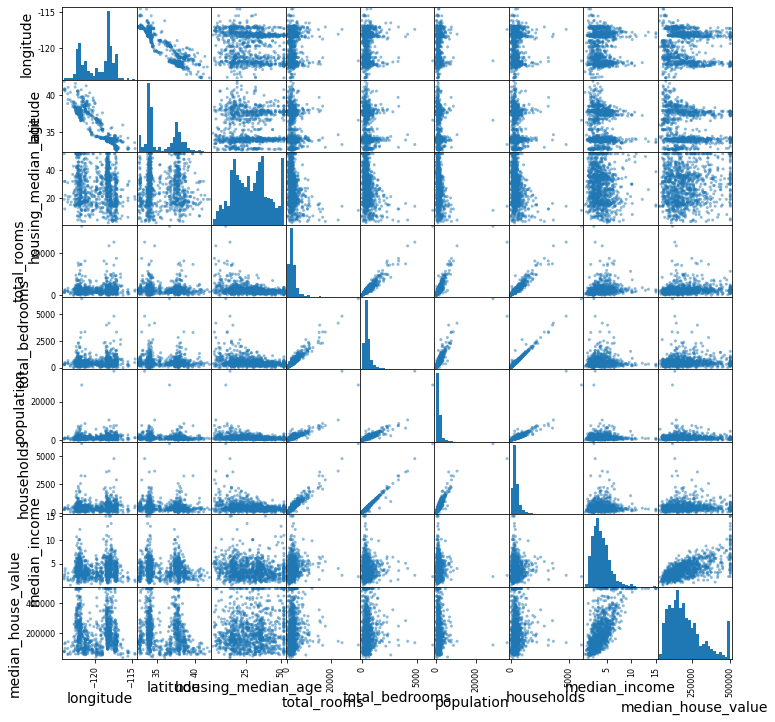

In [ ]:
_ = pd.plotting.scatter_matrix(housing.iloc[::20], figsize=(12, 12), alpha=0.5, hist_kwds={'bins': 25})

**Pregunta**: ¿ven algo interesante que no ha sido revelado por la matriz de correlación de Pearson?

**Pregunta 2**: ¿entienden qué representan los histogramas en la diagonal? Si eso no está claro, intenten experimentar con la función `plt.hist` y un único atributo (vea la celda abajo)

In [ ]:
_ = plt.hist(housing.median_house_value, bins=25, histtype='step')
plt.xlabel('Median House Value')

### Gráficos de Dispersión (*Scatter Plots*)

Hagamos un gráfico simple de dispersión de Latitud vs. Longitud

**Tip**. Note que uno no necesita crear las instancias figura (`Figure`) y ejes (`Axes`) como arriba. Podemos simplemente usar la función el el paquete `plt`.

Text(0, 0.5, 'Latitud')

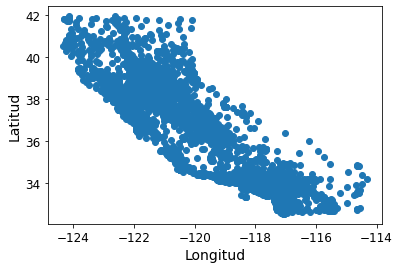

In [ ]:
# Hagamos un gráfico simple de latitud vs longitud
scatter = plt.scatter(housing.longitude, housing.latitude)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

Esta es una gráfica bastante fea. No nos dice mucho. Podemos ver la forma de California, pero nada más.

Seguro que podemos conseguir algo mejor.

Para empezar, hagamos el mismo gráfico que arriba usando transparencia para los puntos.

(Para controlar el tamaño de la figura, creamos una instancia `figure` primero)

Text(0, 0.5, 'Latitud [grados]')

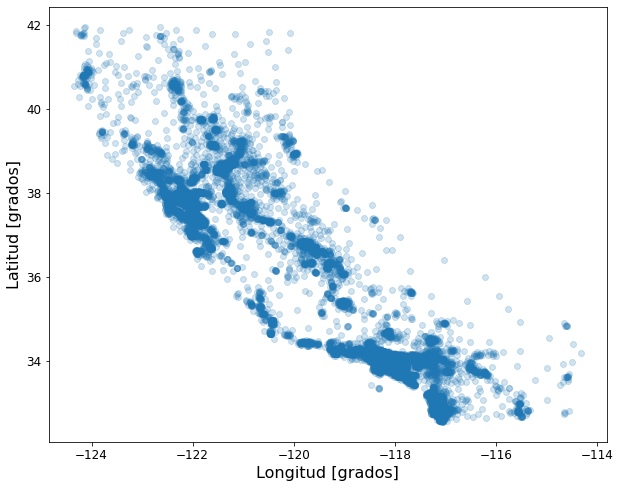

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
scat = ax.scatter(housing.longitude, housing.latitude, alpha=0.2)

ax.set_xlabel('Longitud [grados]', fontsize=16)
ax.set_ylabel('Latitud [grados]', fontsize=16)
# save_fig("better_visualization_plot")

**Ejercicio**

***
* Incluyan más variables en un gráfico de *scatter* usando los argumentos de color (`color` o `c`) y tamaño (`size` o `s`). Además, recuerde que puede mejorar algunos gráficos haciendo los puntos semi-transparantes con `alpha`.

**Nota**: pueden salvar las figuras que quieran con la función `save_fig` definida arriba.

**Ahora** podemos ver que algunas regiones son más densamente pobladas que otras.

*** 

**Pregunta**: qué otras variables incluiría? Complete el modelo abajo para crear nuevos gráficos de dispersión.

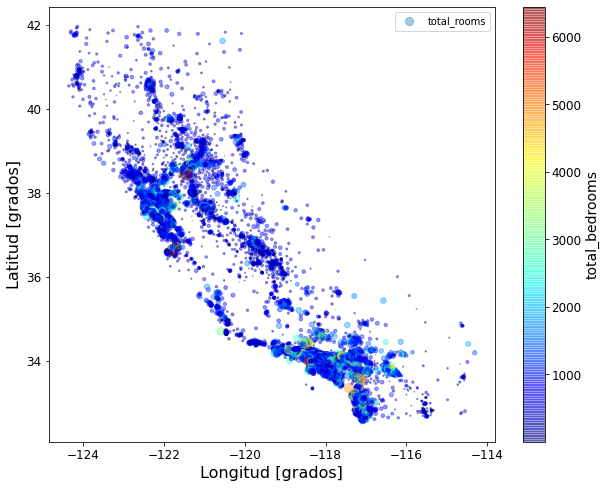

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

color_feature = 'total_bedrooms'
size_feature = 'total_rooms'

scat = plt.scatter(housing.longitude, housing.latitude, alpha=0.4, 
                  c=housing[color_feature], cmap='jet',
                  s=housing[size_feature]/300, label=size_feature)
plt.colorbar(scat, label=color_feature)

ax.set_xlabel('Longitud [grados]', fontsize=16)
ax.set_ylabel('Latitud [grados]', fontsize=16)

leg = ax.legend()

**Tip**. Quizás quiera usar un factor numérico para definir la escala de las características de tamaño y color, de forma a usar correctamente el rango completo de tamaños y colores.

**Tip 2**. También puede querer experimentar con diferentes escalas de colores, cambiando el argumento `cmap` (de *color map*). Una lista de los mapas de colores se puede obtener ejecutando la celda arriba.

**Tip 3**. Copie el código arriba en una nueva celda para hacer otras pruebas.

Por fin, para el *golpe de gracia*, puede superponer su gráfica favorita sobre un lindo mapa de California. El código abajo es tomado del repositório de A. Géron.

In [ ]:
# Baja la imagen de California
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)
DOWNLOAD_ROOT = "https://github.com/IAI-UNSAM/datasets/raw/master/"
filename = "california.png"
print("Downloading {} from {}".format(filename, DOWNLOAD_ROOT))

MAP_URL = DOWNLOAD_ROOT + "images/" + filename

def fetch_california_map(map_url=MAP_URL, image_path=IMAGES_PATH):
    os.makedirs(image_path, exist_ok=True)
    !wget {map_url} -P {image_path}
    return

fetch_california_map()

--2022-09-19 13:11:01--  https://github.com/IAI-UNSAM/datasets/raw/master/images/california.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/images/california.png [following]
--2022-09-19 13:11:01--  https://raw.githubusercontent.com/IAI-UNSAM/datasets/master/images/california.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10034 (9.8K) [image/png]
Saving to: ‘./images/california.png’

california.png      100%[===================>]   9.80K  --.-KB/s    in 0s      

2022-09-19 13:11:02 (92.5 MB/s) - ‘./images/california.png’ saved [10034/10034]



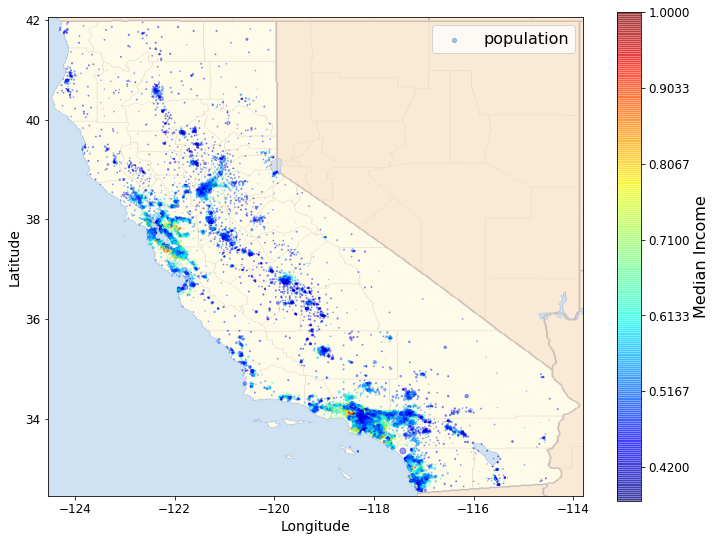

In [ ]:
import matplotlib.image as mpimg

# Lee la imagen de California
filename = "california.png"
california_img = mpimg.imread(os.path.join(IMAGES_PATH, filename))

fig = plt.figure(figsize=(12, 9))

color_feature = 'median_income'
size_feature = 'population'

scat = plt.scatter(housing.longitude, housing.latitude, alpha=0.4, 
                  c=housing[color_feature], cmap='jet',
                  s=housing[size_feature]/1000, label=size_feature)

# Muestra la imagen de abajo
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# Nombre de los ejes
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Adecuar la barra de colores
colorfeat = housing[color_feature]
tick_values = np.linspace(colorfeat.min(), colorfeat.max(), 11)
cbar = plt.colorbar(ticks=tick_values/colorfeat.max())
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label(color_feature.replace('_', ' ').title(), fontsize=16)

plt.legend(fontsize=16)
# save_fig("california_housing_prices_plot")
plt.show()

**Estas** gráficas finales contienen mucha información.

**Pregunta.** Podemos relacionar esa gráfica a nuestro conocimiento sobre el mercado habitacional?

## Conclusión

Fuimos desde un archivo separado por comas (`.csv`) hasta visualizaciones muy informativas, explorando como las variables dependen entre ellas y también algunas peculiaridades en algunas columnas (como valores que faltan). Todavía no hemos usado ningún concepto estadístico (bueno, quizás el coeficiente de Pearson cuente como uno), ni tampoco un modelo matemático.

Este tipo de anális exploratório de datos es requerido como un primer paso en todos los proyectos de aprendizaje automático y es una herramienta poderosa para maximizar lo que se puede extraer de los datos.

In [ ]:
pd.get_dummies(housing.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
pd.concat([housing, pd.get_dummies(housing.ocean_proximity)], axis=1).drop(['ocean_proximity'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


## Extras

### Codificación *one-hot* usando `pandas`

In [ ]:
pd.get_dummies(housing.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


Ahora concatene nuevas columnas con uma tabla anterior y remueva la variable antigua `ocean_proximity`.

In [ ]:
new_housing = pd.concat([housing, pd.get_dummies(housing.ocean_proximity)], axis=1).drop(['ocean_proximity'], axis=1)
new_housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


### Codificación por color

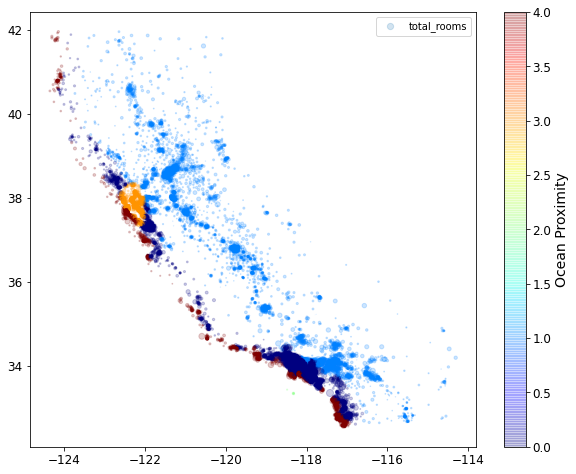

In [ ]:
# Generar códigos de colores
from sklearn import preprocessing as pre
ordenc = pre.OrdinalEncoder()
color_code = ordenc.fit_transform(housing.loc[:, ['ocean_proximity',]]).flatten()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

# Usar códigos de color como color
size_feature = 'total_rooms'
color_feature = 'Ocean Proximity'

scat = plt.scatter(housing.longitude, housing.latitude, alpha=0.2, 
                  c=color_code, cmap='jet',
                  s=housing[size_feature]/500, label=size_feature)
plt.colorbar(scat, label=color_feature)
leg = ax.legend()


# **Ejercicios**

Se observa una correlacion de pearson de 0.7 entre las variables Median House Value y Median Income.
A que se puede deber esta correlación?

Grafique ambas variables por separado, como son sus distribuciones?
(Incluir en su respuesta términos como media, skewness, simetría, valores atípicos)
Importante: que significan los valores que toman estas variables? Son pesos, dolares, criptomonedas?

Grafique Median House value en función de Median Income y describa la relación entre estas variables a partir del gráfico.